# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [21]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

import joblib

In [22]:
# Step 1: import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [23]:
# TODO: view the shape of your data
#Step 2:Data Exploration & cleaning
print("Shape", transactions.shape)
transactions.info()
transactions.describe()

print("Missing values in columns", transactions.isnull().sum())
print("Duplicate rows", transactions.duplicated().sum())
print("Count of transaction types", transactions['type'].value_counts())
print("Fraud count:", transactions['isFraud'].value_counts())
print("Flagged counts", transactions['isFlaggedFraud'].value_counts())


Shape (1000000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB
Missing values in columns type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Du

C:\Users\jessb\AppData\Local\Temp\ipykernel_30216\3398753551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=transactions, palette='viridis')


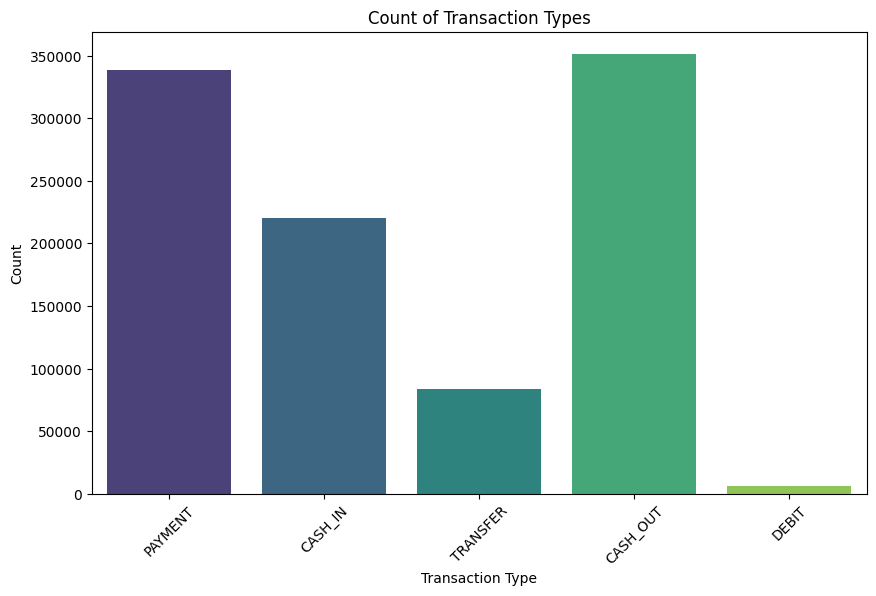

C:\Users\jessb\AppData\Local\Temp\ipykernel_30216\3398753551.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=transactions, palette='coolwarm')


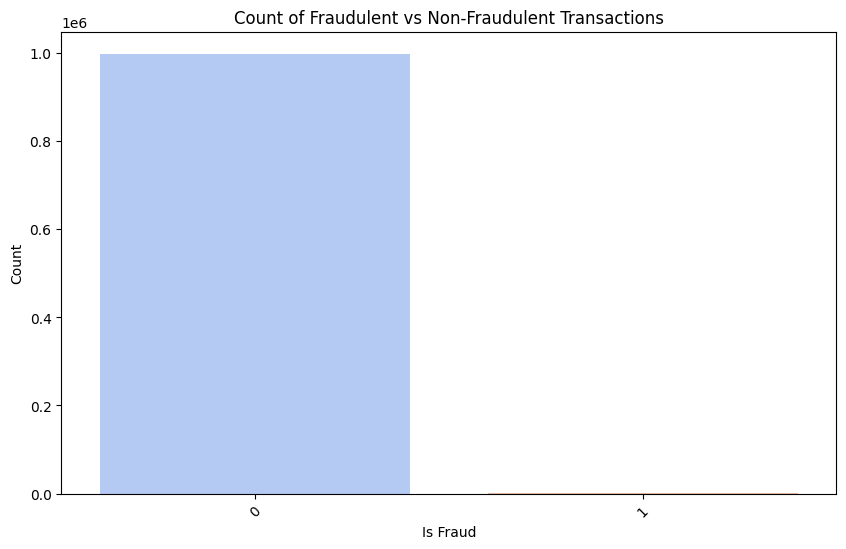

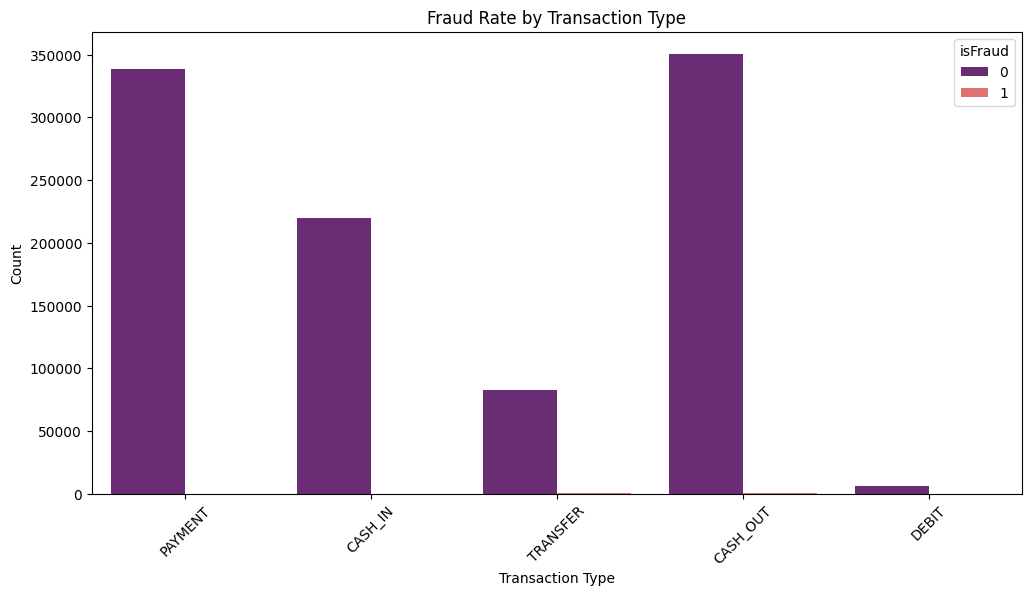

C:\Users\jessb\AppData\Local\Temp\ipykernel_30216\3398753551.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='plasma')


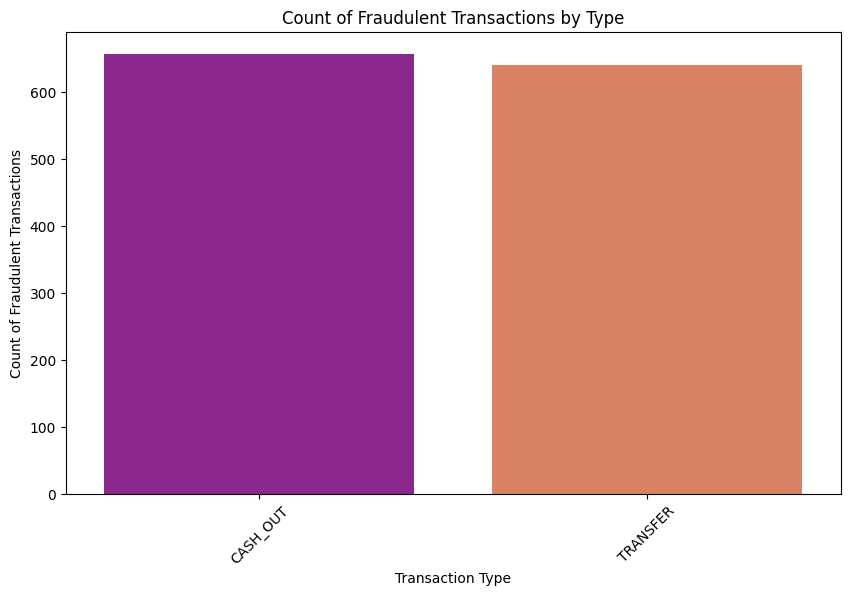

Fraudulent Transactions:
 count    1.297000e+03
mean     1.355199e+06
std      2.252516e+06
min      0.000000e+00
25%      1.204119e+05
50%      4.073478e+05
75%      1.425063e+06
max      1.000000e+07
Name: amount, dtype: float64

Non-Fraudulent Transactions:
 count    9.987030e+05
mean     1.780941e+05
std      6.010807e+05
min      3.000000e-02
25%      1.334550e+04
50%      7.426004e+04
75%      2.079743e+05
max      9.244552e+07
Name: amount, dtype: float64


C:\Users\jessb\AppData\Local\Temp\ipykernel_30216\3398753551.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount', data=filtered_transactions, palette='coolwarm')


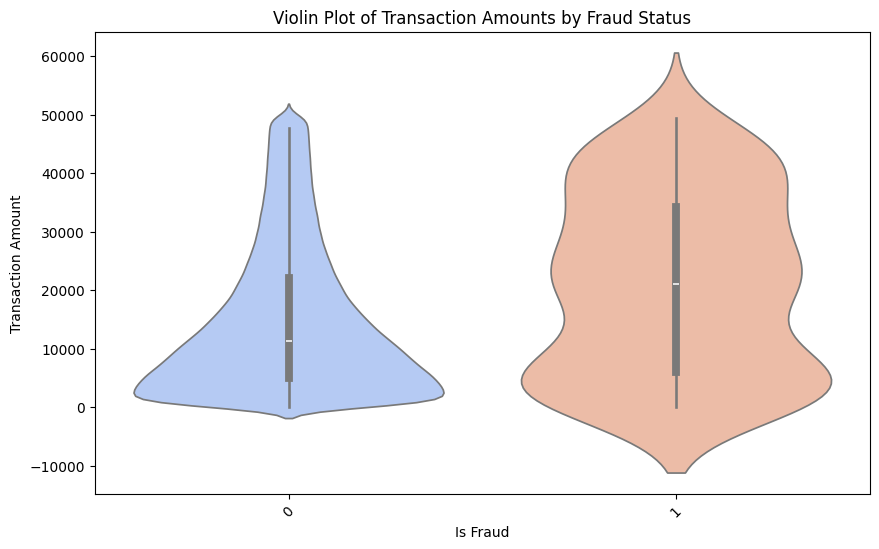

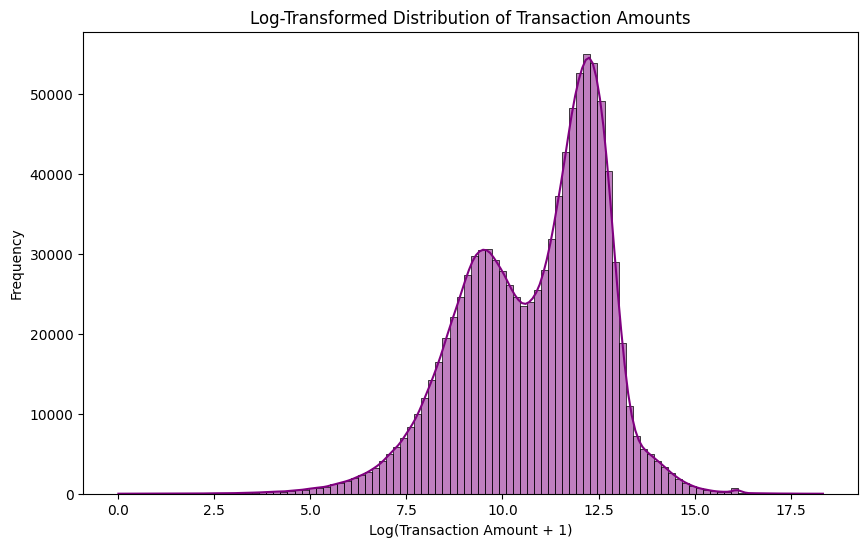

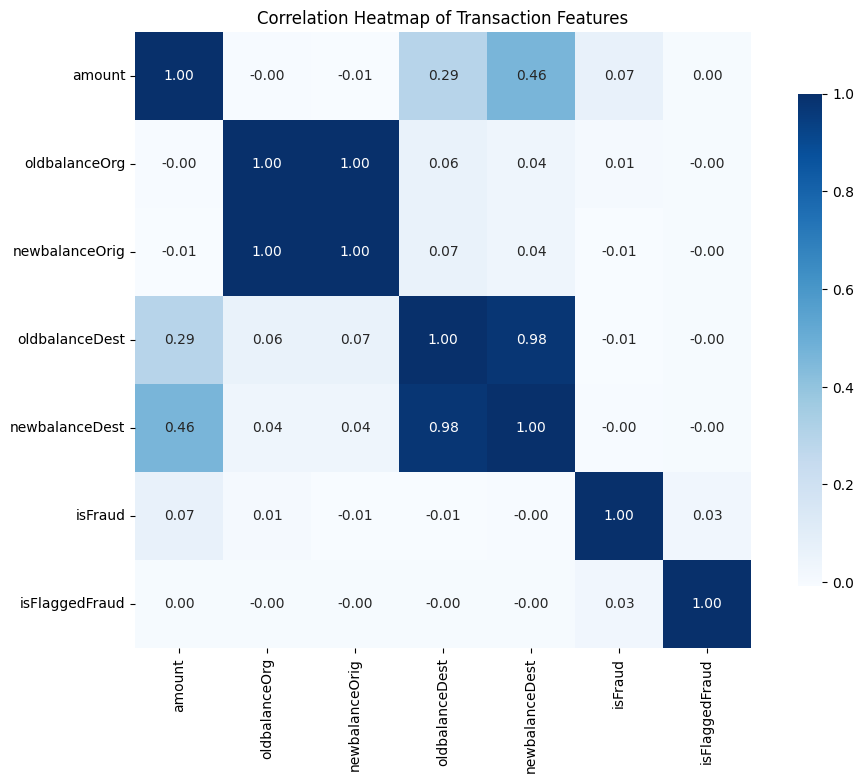

Flagged Fraud Transactions Count: 1


In [24]:
#Step 3:Exploratory data analysis

# Visualizing the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=transactions, palette='viridis')
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Fraudulent transactions vs Non-Fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=transactions, palette='coolwarm')
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Fraud rate by transaction type
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=transactions, palette='magma')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Fraud Count by Transaction Type
fraud_counts = transactions[transactions['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='plasma')
plt.title('Count of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

fraud = transactions[transactions['isFraud'] == 1]['amount'].describe()
not_fraud = transactions[transactions['isFraud'] == 0]['amount'].describe()
print("Fraudulent Transactions:\n", fraud)
print("\nNon-Fraudulent Transactions:\n", not_fraud)

#Transaction Amount Distribution
#plt.figure(figsize=(10, 6))
#sns.histplot(transactions['amount'], bins=100, kde=True, color='blue')
#plt.title('Distribution of Transaction Amounts')
#plt.xlabel('Transaction Amount')
#plt.ylabel('Frequency')
#plt.xlim(0, transactions['amount'].quantile(0.75))
#plt.show()


#Boxplot of Amount by Fraud Status
#plt.figure(figsize=(10, 6))
#sns.boxplot(x='isFraud', y='amount', data=transactions, palette='cividis')
#plt.title('Boxplot of Transaction Amounts by Fraud Status')
#plt.xlabel('Is Fraud')
#plt.ylabel('Transaction Amount')
#plt.xticks(rotation=45)
#plt.show()

#Violin Plot of Amount by Fraud Status
filtered_transactions = transactions[transactions['amount'] < 50000]  # Filter out extreme values
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount', data=filtered_transactions, palette='coolwarm')
plt.title('Violin Plot of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# Histoplot of amount by fraud status
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(transactions['amount']), bins=100, kde=True, color='purple')
plt.title('Log-Transformed Distribution of Transaction Amounts')
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Frequency')
plt.show()

#Correlation Heatmap
numeric_data = transactions.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='Blues', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Transaction Features')
plt.show()

#Checked flagged fraud transactions
flagged_fraud = transactions[transactions['isFlaggedFraud'] == 1]
print("Flagged Fraud Transactions Count:", flagged_fraud.shape[0])





In [25]:
#Step 4: Feature Engineering
# Create new features based on transaction data

#Drop unnecessary columns
df = transactions.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])


#Add log to normalize skewness
df['log_amount'] = np.log1p(df['amount']) 

# Convert amount to thousands for easier interpretation
df['amount_k'] = df['amount'] / 1000

# Flag high-value transactions
df['isHighValue'] = (df['amount_k'] > 1000).astype(int) 

#Create interations between features
df['type_vs_amount'] = df['type'].astype(str) + '_' + pd.cut(df['amount'], bins=[0, 10000, 100000, 1e6, 1e8], labels=False).astype(str) 

#One-hot encode categorical features
df = pd.get_dummies(df, columns=['type', 'type_vs_amount'], drop_first=True)

#Define X and y
X = df.drop(columns=['isFraud'])
y = df['isFraud']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Standardize numerical features
scaler = StandardScaler()
X[['amount', 'log_amount', 'amount_k']] = scaler.fit_transform(X[['amount', 'log_amount', 'amount_k']])

#Transform test data
X_test[['amount', 'log_amount', 'amount_k']] = scaler.transform(X_test[['amount', 'log_amount', 'amount_k']])

In [26]:
#step 5: Train and evaluate models

#Train models
#Smaller sample for faster training due to lag
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

model = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train_sample, y_train_sample)


#Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199741
           1       1.00      0.46      0.63       259

    accuracy                           1.00    200000
   macro avg       1.00      0.73      0.81    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
 [[199741      0]
 [   140    119]]
ROC AUC Score: 0.9852089730332054


C:\Users\jessb\AppData\Local\Temp\ipykernel_30216\900289851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


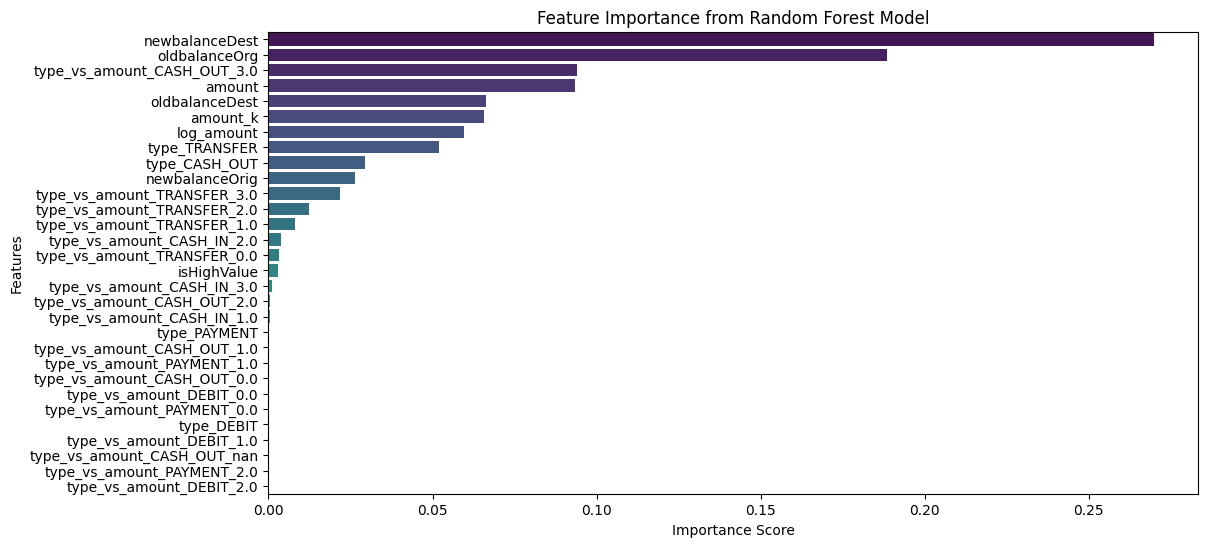

c:\Users\jessb\anaconda3\envs\ds\lib\site-packages\sklearn\utils\_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

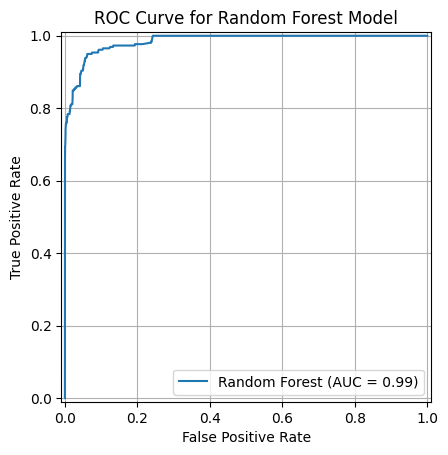

In [27]:
#Step 6: Interpret results

#Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_proba), estimator_name='Random Forest').plot()
plt.title('ROC Curve for Random Forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()


In [28]:
#Step 7: Communicate findings

fraud_rate = y_test.mean()
accuracy = model.score(X_test, y_test)
roc_auc = roc_auc_score(y_test, y_proba)

print("----- Model Results Summary -----")
print(f"Fraud Rate in Test Set: {fraud_rate:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
    

----- Model Results Summary -----
Fraud Rate in Test Set: 0.0013
Model Accuracy: 0.9993
ROC AUC Score: 0.9852


In [29]:
#Step 8: Deploy the model

# Save the model for deployment
joblib.dump(model, '../models/fraud_detection_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

# Load the model and scaler for future use
model = joblib.load('../models/fraud_detection_model.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example of using the model for prediction
def predict_fraud(transaction_data):
    transaction_data = transaction_data.copy()
    transaction_data['log_amount'] = np.log1p(transaction_data['amount'])
    transaction_data['amount_k'] = transaction_data['amount'] / 1000
    transaction_data['isHighValue'] = (transaction_data['amount_k'] > 1000).astype(int)
    transaction_data = transaction_data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], errors='ignore')

#Scale the numerical features
    transaction_data[['amount', 'log_amount', 'amount_k']] = scaler.transform(transaction_data[['amount', 'log_amount', 'amount_k']])
    
    #One-hot encode categorical features
    transaction_data = pd.get_dummies(transaction_data, columns=['type'], drop_first=True)
    
    #Ensure all columns match the model's training data
    for col in X.columns:
        if col not in transaction_data.columns:
            transaction_data[col] = 0
    
      # Reorder columns to exactly match training data
    transaction_data = transaction_data[X.columns]

    # Predict class and probabilities
    prediction = model.predict(transaction_data)
    probability = model.predict_proba(transaction_data)[:, 1]

    return prediction, probability

    
#Example usage
sample = transactions.sample(1)
pred, prob = predict_fraud(sample)
print(f"Predicted class: {pred[0]} | Probability of fraud: {prob[0]:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '../models/fraud_detection_model.pkl'

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here